In [1]:
import importlib
import sys
from pathlib import Path
import pandas as pd
# Ajouter le chemin vers src au PYTHONPATH
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

from src.data_loader import load_clean_recipes, load_clean_interactions, load_clean_merged

from src.data_visualization import (rating_distribution,
    recipe_mean_rating_distribution,
    top_users_by_activity,
    user_mean_rating_distribution,
    user_count_vs_mean_rating,
    activity_bucket_bar,
    analyze_contributors,
    statistique_descriptive,
    plot_prep_time_distribution,
    plot_ingredient,
    plot_n_steps_distribution,
    analyse_tags,
    plot_tags_distribution,
    plot_nutrition_distribution,
    analyze_ingredients_vectorized,
    minutes_group_negative_reviews_bar,
    spearman_correlation,
    plot_ingredients_vs_negative_score,
    analyze_tags_correlation,
    nutrition_correlation_analysis,
    get_most_negative_user,
    ##generate_all_interaction_univariates,
)

#Chargement des données nettoyées
recipes_df = load_clean_recipes()
interactions_df= load_clean_interactions()
merged_df = load_clean_merged()


### **Analyse univariée de la table interactions**

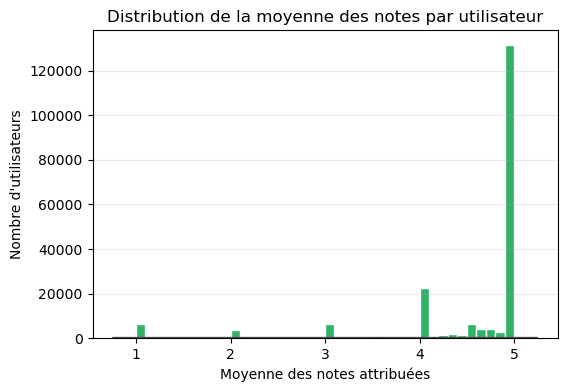

In [2]:
user_mean_rating_distribution(interactions_df, show=True)

Nous pouvons visualiser la répartition des notes que les utilisateurs du site ont attribués. On peut constater un fort déséquilibre. 

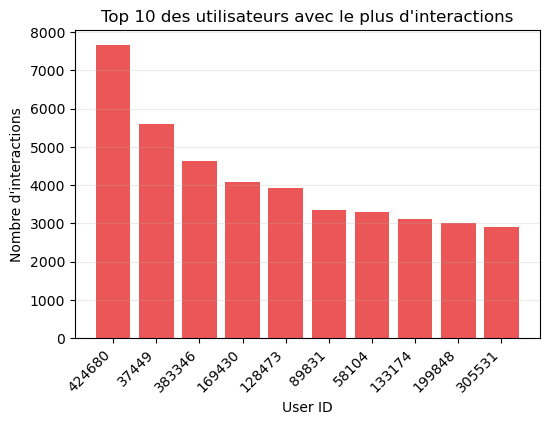

In [3]:
top_users_by_activity(interactions_df, show=True)

In [2]:

result = get_most_negative_user(interactions_df)
print("User avec le plus d'avis négatifs (note <=2):", result["user_id"])
print("Nombre d'avis négatifs par note:", [result["rating_counts"][i] for i in range(1, 6)])

User avec le plus d'avis négatifs (note <=2): 3243
Nombre d'avis négatifs par note: [0, 0, 1, 0, 0]


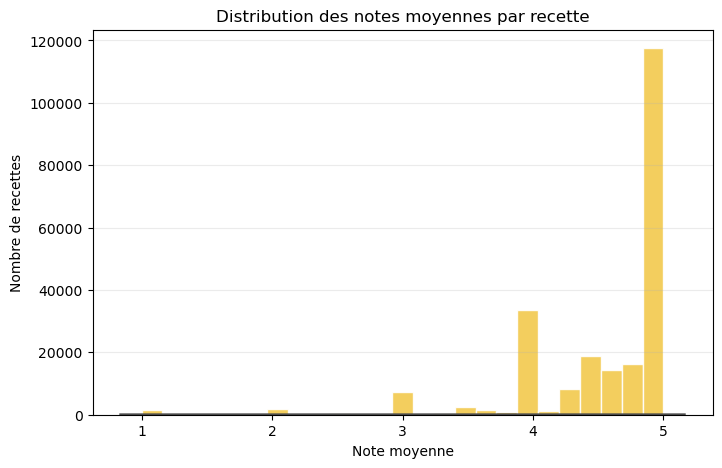

In [5]:
recipe_mean_rating_distribution(interactions_df, show=True)

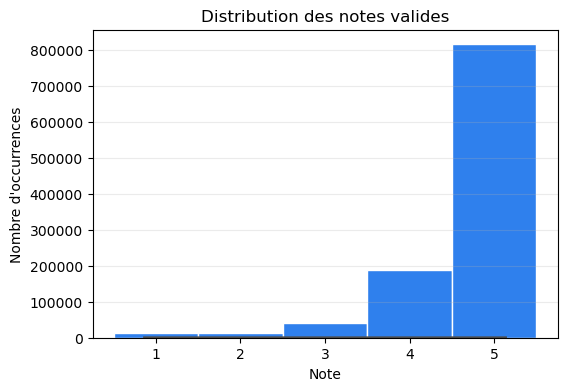

In [6]:
rating_distribution(interactions_df,show=True)


L’analyse univariée de la variable rating met en évidence une forte concentration des évaluations sur les valeurs hautes de l’échelle (4 et 5).
Ce biais positif traduit une satisfaction générale élevée sur la plateforme, mais il indique aussi que la variable rating n’est pas symétriquement distribuée.

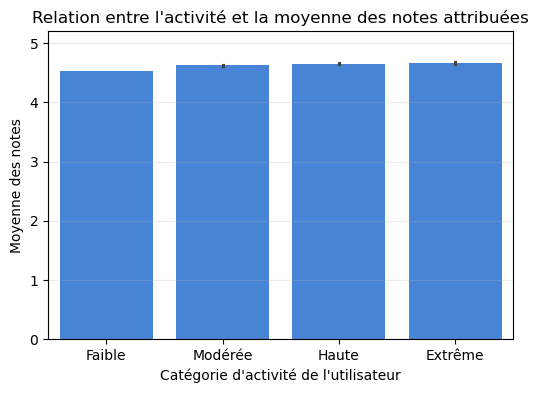

In [7]:
activity_bucket_bar(interactions_df, show=True)

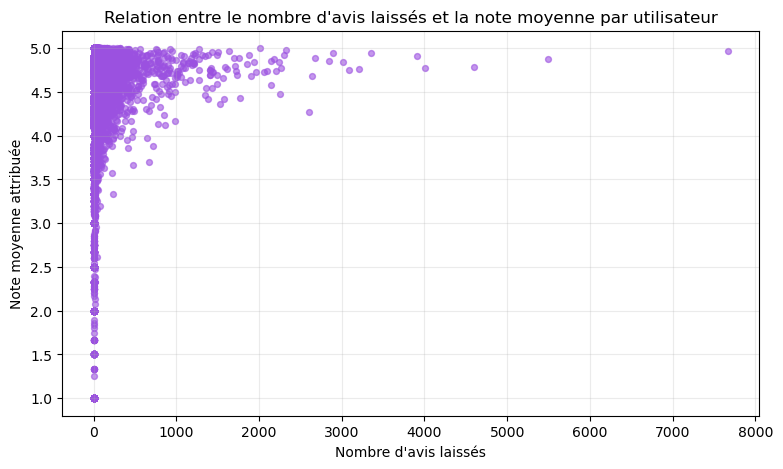

In [8]:
user_count_vs_mean_rating(interactions_df, show=True)

Ce graphique représente la note moyenne des utilisateurs par rapport au nombre d'avis laissé. Nous pouvons faire 2 interprétations remarquable : premièrement, au cas par cas, la plupart des utilisateurs laisse très peu d'avis (car forte concentration proche de 0). Deuxièment, nous pouvons voir que les utilisateurs ayant donné le plus d'avis ont une moyenne de note de 4,5 ~ 5, par exemple pour l'utilisateur qui a donné le plus d'avis a une moyenne des notes très proche de 5 ! 

In [4]:
interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   user_id           1132367 non-null  int64  
 1   recipe_id         1132367 non-null  int64  
 2   date              1132367 non-null  object 
 3   rating            1071520 non-null  float64
 4   review            1132367 non-null  object 
 5   binary_sentiment  1132367 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 51.8+ MB


In [10]:
##conversions des types de données
interactions_df['date']=pd.to_datetime(interactions_df['date'])
interactions_df['user_id']=interactions_df['user_id'].astype('category')

### **Analyse Univariée RECIPES**

Dans cette partie nous nous intéressons à l'étude univariée de la table *recipes*. Nous allons chercher à déterminer la tendance globale des différentes variables de façon isolée

**Analyse sur les contributeurs**

In [4]:
# conversion de la variable contributor_type en type 'category'
recipes_df['contributor_id'] = recipes_df['contributor_id'].astype('category')

In [4]:
# affichage d'une nombre de contributeurs uniques
num_contributors = recipes_df['contributor_id'].nunique()
print(f"Nombre de contributeurs uniques: {num_contributors}")
print("nombre de recette :", len(recipes_df))

Nombre de contributeurs uniques: 27523
nombre de recette : 224528


Il y a 27523 contributeurs unique pour 224528 recettes dans notre dataset

In [ ]:
#nombre moyen de recette par contributeur
mean_recipes_per_contributor = len(recipes_df) / num_contributors
print(f"Nombre moyen de recettes par contributeur: {mean_recipes_per_contributor:.2f}")
#nombre median de recette par contributeur
recipes_per_contributor = recipes_df['contributor_id'].value_counts()
median_recipes_per_contributor = recipes_per_contributor.median()
print(f"Nombre median de recettes par contributeur: {median_recipes_per_contributor:.2f}")

#nombre de personne qui ont plus de 20 recettes
active_contributors = (recipes_per_contributor >= 20).sum()
print(f"Nombre de contributeurs avec au moins 20 recettes: {active_contributors}")

#nombre de personne ayant une seule recette
single_recipe_contributors = (recipes_per_contributor == 1).sum()
print(f"Nombre de contributeurs avec une seule recette: {single_recipe_contributors}")

# top contributeurs
sorted_contributors = recipes_per_contributor.sort_values(ascending=False)
cumulative_recipes = sorted_contributors.cumsum()
total_recipes = sorted_contributors.sum()
cumulative_percentage = cumulative_recipes / total_recipes * 100
rang_50 = cumulative_percentage[cumulative_percentage <= 50].index[-1]
position_50 = sorted_contributors.index.get_loc(rang_50) + 1
print(f"Nombre de contributeurs nécessaires pour atteindre 50% des recettes: {position_50}")

Nombre moyen de recettes par contributeur: 8.16
Nombre median de recettes par contributeur: 1.00
Nombre de contributeurs avec au moins 20 recettes: 1631
Nombre de contributeurs avec une seule recette: 15125
Nombre de contributeurs nécessaires pour atteindre 50% des recettes: 60


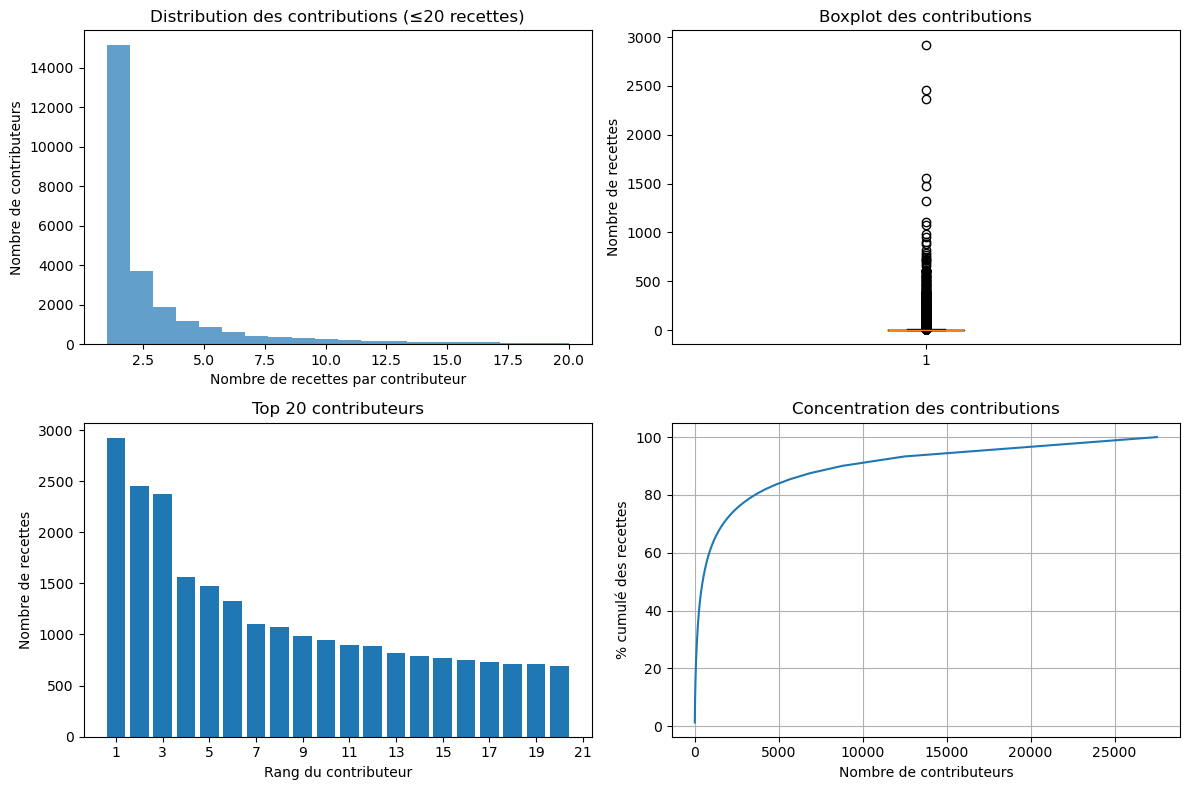

In [2]:
# analyse des contributeurs des recettes
analyze_contributors(recipes_df)

Parmi tous les contributeurs, plus de la moitié ont posté 1 seule recette. Le contributeur le plus actif a posté à lui seul quasiment 3000 recette. 

Nous pouvons aussi observer que plus de 50% des recettes sont produits par le top 500 des contributeurs parmi les 27523 contributeurs

**Analyse sur les minutes**

In [13]:
statistique_descriptive(recipes_df, column='minutes')

,Valeur
Moyenne,91.243310
Médiane,40.000000
Écart-type,566.775875
Variance,321234.892258
Minimum,0.000000
Maximum,43200.000000
quantile_025,20.000000
quantile_075,65.000000
skewness,41.035905
kurtosis,2218.334903


La variable minute présente une forte asymétrie à droite. La majorité des recettes ont un temps de préparation assez court mais certaines recettes très longues tirent la moyenne vers le haut.

On peut également observer une dispersion très importante (Variance = 321234.9). 

Nous pouvons prendre en note 2 valeurs particulières :
-   Certaine recette présente un temps de préparation de 0, ce qui peut remettre en question la pertinence de la recette. Cependant nous supposons que un temps de 0 correspond à un oubli et que cette valeur ne devrait pas influencer notre étude sur le taux d'insatisfaction des recettes
-   Certaine recette présente un temps de préparation de 43200 minutes, correspondant à un mois de préparation. Ce temps de préparation prend probablement en compte certains facteurs tel que la maturation d'un ingrédient. Nous décidons aussi de le garder dans notre jeu de donnée d'autant plus que ce temps de préparation long pourrait être facteur d'insatisfaction

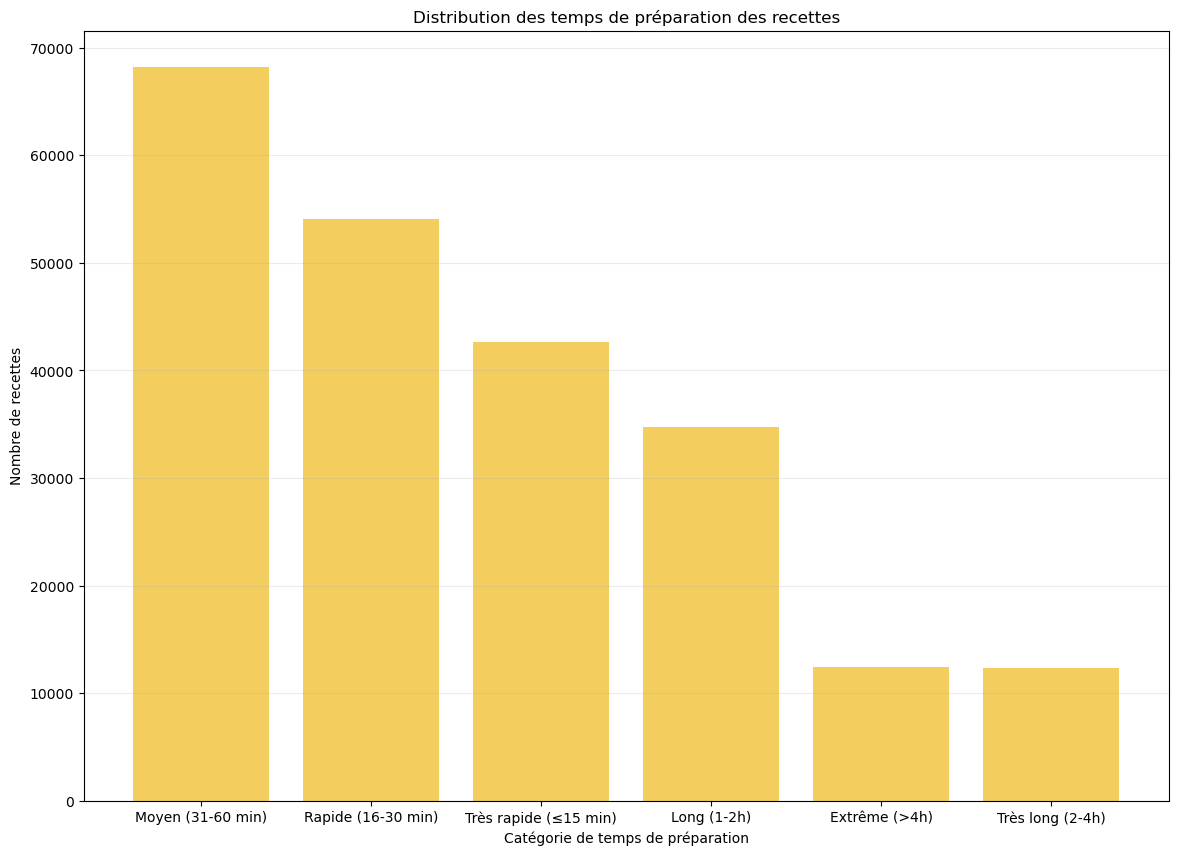

In [14]:
plot_prep_time_distribution(recipes_df, show=True)

Sur le graphique précédent nous avons catégorisé les temps de préparation : 
- Très rapide : $ \leq 15 $ min
- Rapide      : 16 ~ 30 min
- Moyen       : 31 ~ 60 min
- Long        : 1 ~ 2 heures
- Très long   : 2 ~ 4 heures
- Extrême     : $ \geq 4 $ heures

Nous observons que la plupart des recettes prennent au plus 2 heures de prépartations. 
à noté que les recettes avec 0 min de temps de préparation sont aussi inclus dans la catégorie "très rapide", cependant en faisant le calcul ci-dessous nous pouvons voir que ces recettes représentent une très petite partie (0.43%). Cela n'influence donc pas la distribution entière, nous pouvons donc affirmer que la plupart des recettes prennent bien au plus 2 heures de préparations

In [18]:
# proportion de recettes avec un temps de préparation de 0 minute
zero_minute_recipes = merged_df[merged_df['minutes'] == 0]
proportion_zero_minute = len(zero_minute_recipes) / len(merged_df) * 100
print(f"Proportion de recettes avec un temps de préparation de 0 minute: {proportion_zero_minute:.2f}%")

Proportion de recettes avec un temps de préparation de 0 minute: 0.43%


**analyse sur les ingrédients**

In [3]:
analyze_ingredients_vectorized(recipes_df)

,Valeur
Nb_uniques_ingredients,14823
Nb_total_ingredients,2035231
Nb_ingredients_les_plus_utilises,"[(salt, 82856), (butter, 52497), (sugar, 40989)]"
Moyenne,9.064486
Médiane,9.0
Écart-type,3.73149
Minimum,1
Maximum,43


Les ingrédients les plus utilisés dans les recettes sont le sel, le beurre et le sucre.
En moyenne 9 ingrédients est utilisé dans les recettes et cette moyenne est très proche de la médiane on observe donc une distribution plutôt symétrique (cf graphique ci-dessous). Certaines recettes sont très simpliste, elle présente 1 seul ingrédient. Ceci est probablement dû à une erreur de saisie. Comme pour la variable "minutes" nous décidons de les garder.

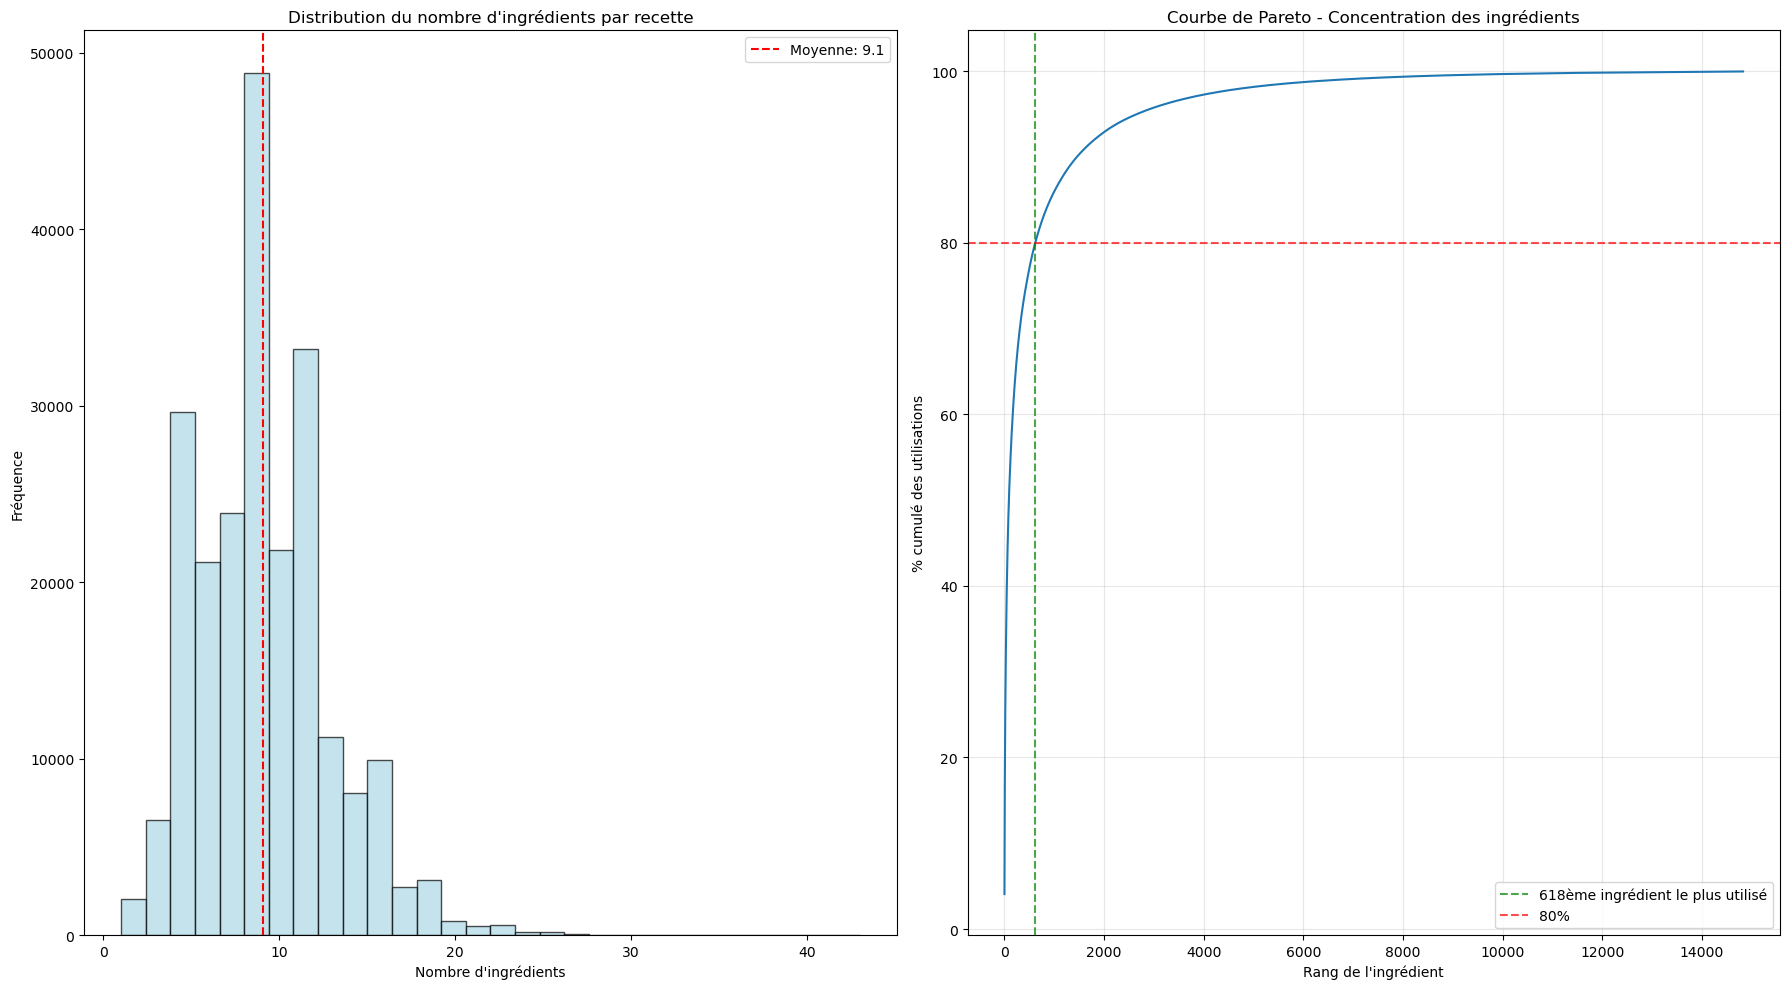

In [21]:
plot_ingredient(recipes_df, show=True)

Les 618 ingrédients les plus utilisés dans les recettes représentent 80% des ingrédients les plus utilisés

**analyse pour le nombre d'étapes**

In [17]:
statistique_descriptive(recipes_df, column='n_steps')

,Valeur
Moyenne,9.735926
Médiane,9.000000
Écart-type,5.947565
Variance,35.373530
Minimum,0.000000
Maximum,145.000000
quantile_025,6.000000
quantile_075,12.000000
skewness,1.959170
kurtosis,9.708852


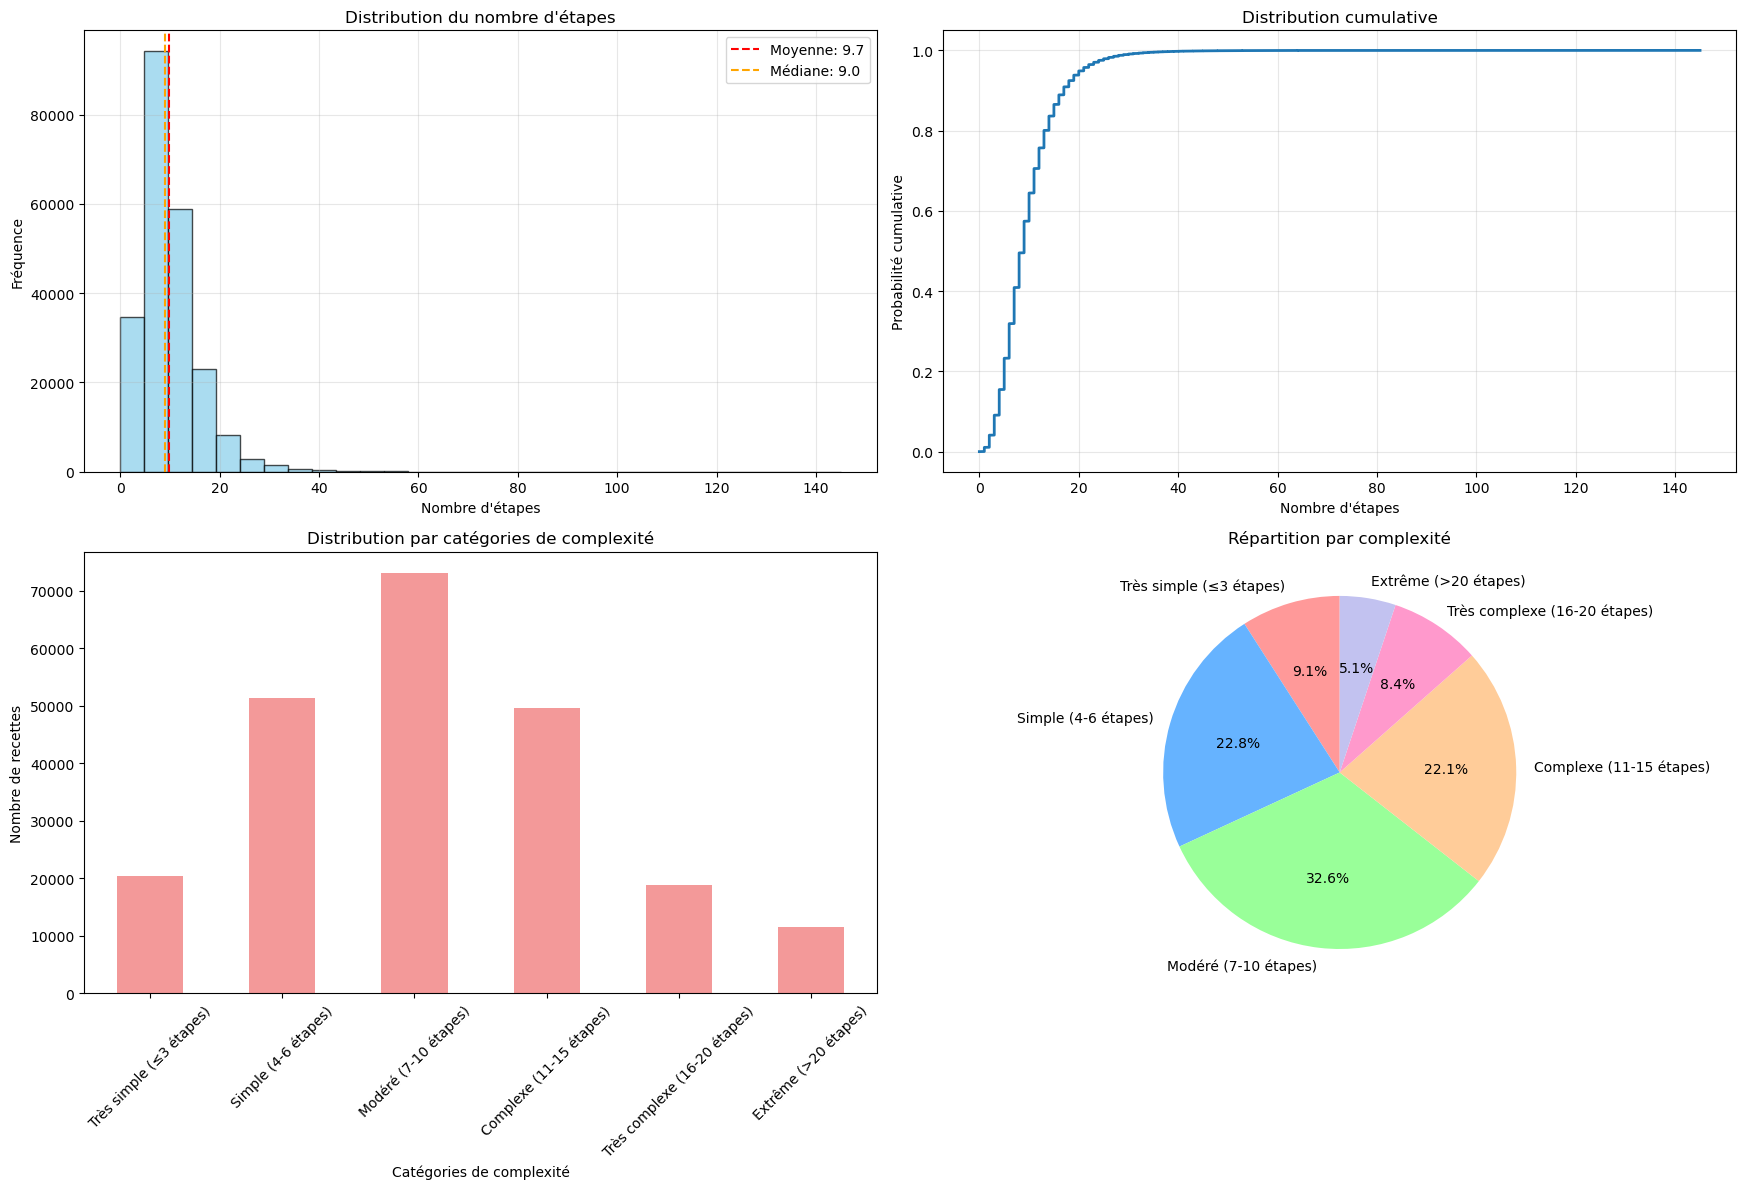

In [18]:
#visualisation graphique 

plot_n_steps_distribution(recipes_df, show=True)

**Analyse sur la variable tags**

In [2]:
analyse_tags(recipes_df)

,Valeur
Nb_uniques_tags,552
Nb_tags_les_plus_utilises,"[(preparation, 223470), (time-to-make, 218321)..."
Taux_tags_Uniques (1),8.152174
Taux_tags_Tres_rares (2-5),1.992754
Taux_tags_Rares (6-20),4.347826
Taux_tags_Peu_communs (21-100),11.050725
Taux_tags_Communs (101-1000),28.623188
Taux_tags_Tres_communs (>1000),45.833333


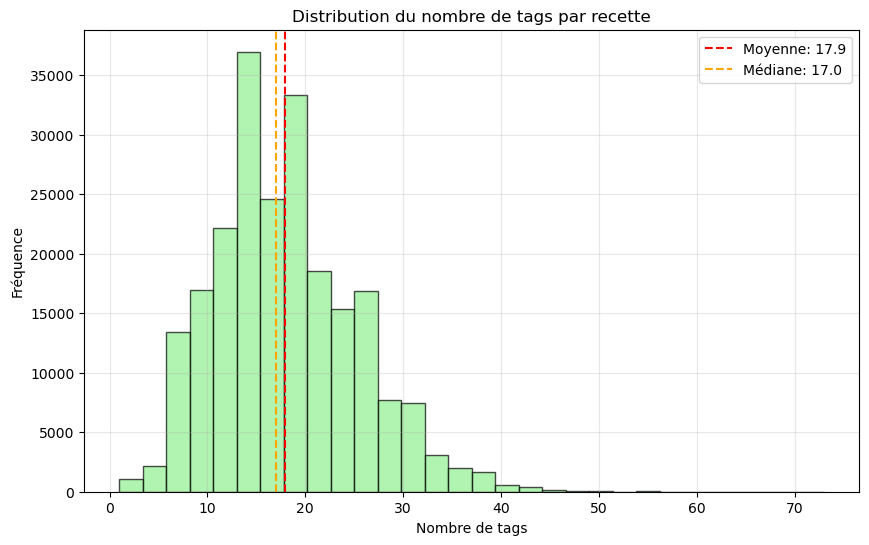

In [20]:
plot_tags_distribution(recipes_df, show=True)

**Analyse des caractéristiques nutritionnelles des recettes**

In [21]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


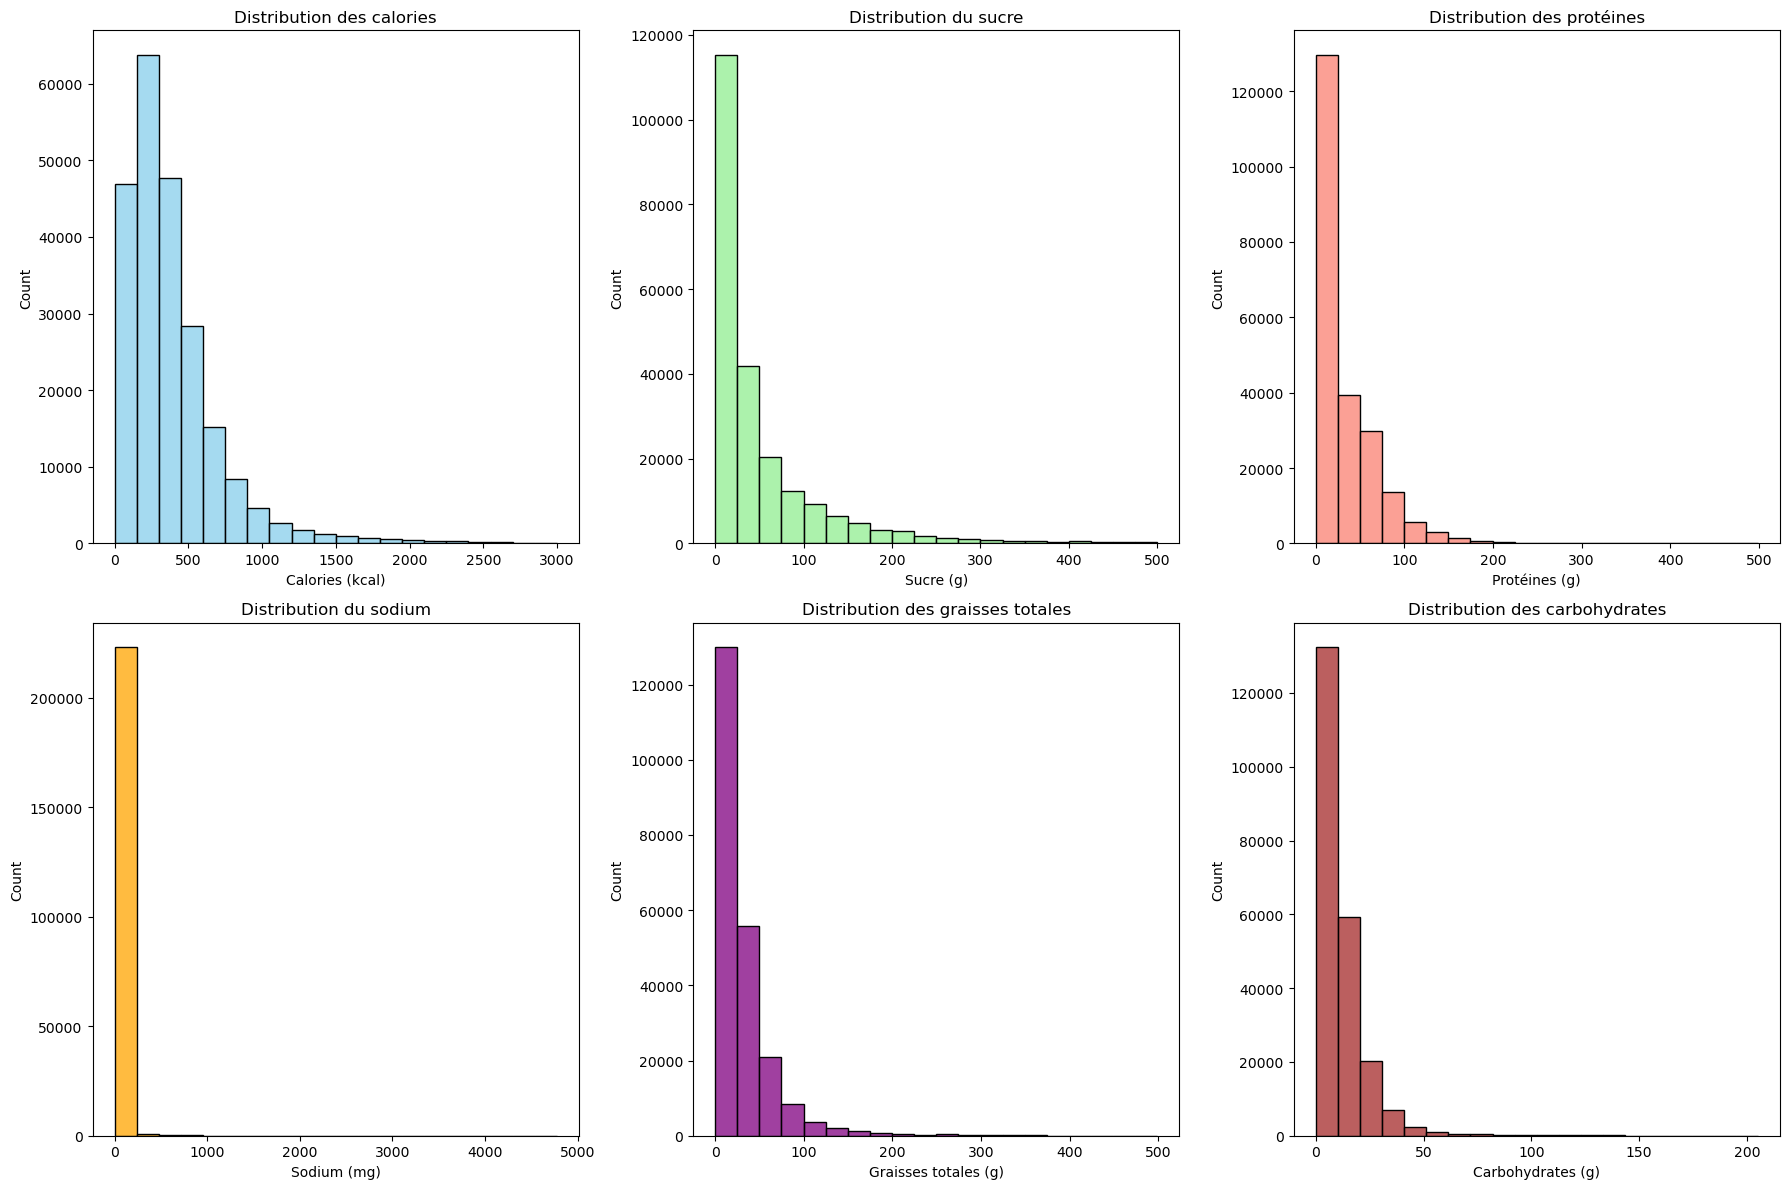

In [2]:
plot_nutrition_distribution(recipes_df, show=True)

In [ ]:
#statistiques descriptives 
statistique_descriptive(recipes_df, column='calories')


,Valeur
Moyenne,386.603240
Médiane,303.900000
Écart-type,335.835942
Variance,112785.779999
Minimum,0.000000
Maximum,2998.400000
quantile_025,170.500000
quantile_075,493.100000
skewness,2.586252
kurtosis,10.385223


In [4]:
statistique_descriptive(recipes_df, column='protein')

,Valeur
Moyenne,32.237632
Médiane,18.000000
Écart-type,37.365450
Variance,1396.176835
Minimum,0.000000
Maximum,499.000000
quantile_025,6.000000
quantile_075,49.000000
skewness,2.498518
kurtosis,11.545162


In [5]:
statistique_descriptive(recipes_df, column='sodium')

,Valeur
Moyenne,26.682930
Médiane,14.000000
Écart-type,80.378674
Variance,6460.731219
Minimum,0.000000
Maximum,4777.000000
quantile_025,5.000000
quantile_075,31.000000
skewness,31.900789
kurtosis,1485.471717


In [6]:
statistique_descriptive(recipes_df, column='sugar')

,Valeur
Moyenne,50.318753
Médiane,23.000000
Écart-type,70.055048
Variance,4907.709808
Minimum,0.000000
Maximum,500.000000
quantile_025,9.000000
quantile_075,61.000000
skewness,2.729275
kurtosis,9.154481


### **Analyse bivariée**

In [3]:
merged_df[merged_df['minutes'] < 1]

,recipe_id,total_reviews,negative_reviews,minutes,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
181,387,2,0,0.0,1999-08-30,"['15-minutes-or-less', 'time-to-make', 'course...","[91.0, 1.0, 72.0, 6.0, 2.0, 3.0, 6.0]",5.0,"['place coffee concentrate in tall glass', 'ad...","['chocolate flavored coffee', 'milk', 'coffee ...",5.0,91.0,1.0,72.0,6.0,2.0,3.0,6.0
346,707,1,0,0.0,1999-08-08,"['15-minutes-or-less', 'time-to-make', 'course...","[508.2, 41.0, 17.0, 15.0, 42.0, 80.0, 15.0]",15.0,"['preheat oven to 375 degrees f', 'for frozen ...","['spinach', 'carrots', 'potatoes', 'low-fat cr...",12.0,508.2,41.0,17.0,15.0,42.0,80.0,15.0
350,736,9,1,0.0,1999-09-07,"['15-minutes-or-less', 'time-to-make', 'course...","[61.5, 3.0, 8.0, 6.0, 6.0, 2.0, 2.0]",9.0,"['in a medium size bowl , combine the whole wh...","['whole wheat flour', 'oat bran', 'cornmeal', ...",11.0,61.5,3.0,8.0,6.0,6.0,2.0,2.0
351,742,3,0,0.0,1999-08-18,"['15-minutes-or-less', 'time-to-make', 'course...","[138.2, 2.0, 0.0, 6.0, 8.0, 1.0, 8.0]",25.0,['in a large mixing bowl stir together the 2 c...,"['all-purpose flour', 'salt', 'egg whites', 'w...",5.0,138.2,2.0,0.0,6.0,8.0,1.0,8.0
356,760,3,0,0.0,1999-08-15,"['15-minutes-or-less', 'time-to-make', 'course...","[1933.3, 163.0, 86.0, 141.0, 391.0, 207.0, 13.0]",5.0,['spread minced garlic on round steak and spri...,"['garlic', 'round steaks', 'salt', 'pepper', '...",10.0,1933.3,163.0,86.0,141.0,391.0,207.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41761,76699,1,0,0.0,2003-11-16,"['15-minutes-or-less', 'time-to-make', 'course...","[343.7, 18.0, 100.0, 24.0, 7.0, 33.0, 19.0]",9.0,['arrange one third of sliced cake in the bott...,"['poundcake', 'vanilla flavor instant pudding ...",6.0,343.7,18.0,100.0,24.0,7.0,33.0,19.0
42649,78355,1,1,0.0,2003-12-09,"['15-minutes-or-less', 'time-to-make', 'course...","[1188.6, 27.0, 70.0, 100.0, 69.0, 26.0, 73.0]",1.0,['dump in bread machine in order of manufactur...,"['yeast', 'basil', 'salt', 'sugar', 'flour', '...",8.0,1188.6,27.0,70.0,100.0,69.0,26.0,73.0
43571,80121,7,1,0.0,2004-01-05,"['15-minutes-or-less', 'time-to-make', 'course...","[752.9, 50.0, 399.0, 15.0, 20.0, 86.0, 37.0]",13.0,"['pick over cranberries', 'chop cranberries in...","['fresh cranberries', 'crushed pineapple', 'wa...",8.0,752.9,50.0,399.0,15.0,20.0,86.0,37.0
45250,83257,16,0,0.0,2004-02-06,"['15-minutes-or-less', 'time-to-make', 'course...","[187.2, 8.0, 14.0, 28.0, 16.0, 4.0, 9.0]",2.0,"['mix all ingredients in large bowl', 'let res...","['black beans', 'corn', 'cilantro', 'red bell ...",11.0,187.2,8.0,14.0,28.0,16.0,4.0,9.0


In [22]:
# proportion de recettes avec un temps de préparation > 120 minutes et un score négatif (<4)
df=merged_df.copy()
df["score"] = merged_df["total_reviews"] - merged_df["negative_reviews"]
long_prep_negative_reviews = df[(df["minutes"] > 120) & (df["score"] >= 4)]
proportion = len(long_prep_negative_reviews) / len(merged_df) * 100
print("nombre de recette avec tps prep > 120 et score négatif :", len(long_prep_negative_reviews))
print(f"Proportion de recettes avec un temps de préparation > 120 minutes et un score négatif: {proportion:.2f}%")




nombre de recette avec tps prep > 120 et score négatif : 6519
Proportion de recettes avec un temps de préparation > 120 minutes et un score négatif: 2.90%


In [4]:
one_month = 60 * 24 * 30  # 43 200 minutes = 30 jours

extreme_recipes = merged_df[merged_df['minutes'] > one_month]
print("Nombre de recettes extrêmes :", len(extreme_recipes))

Nombre de recettes extrêmes : 0


Le temps de préparation influence-t-il le niveau de satisfaction des utilisateurs ?

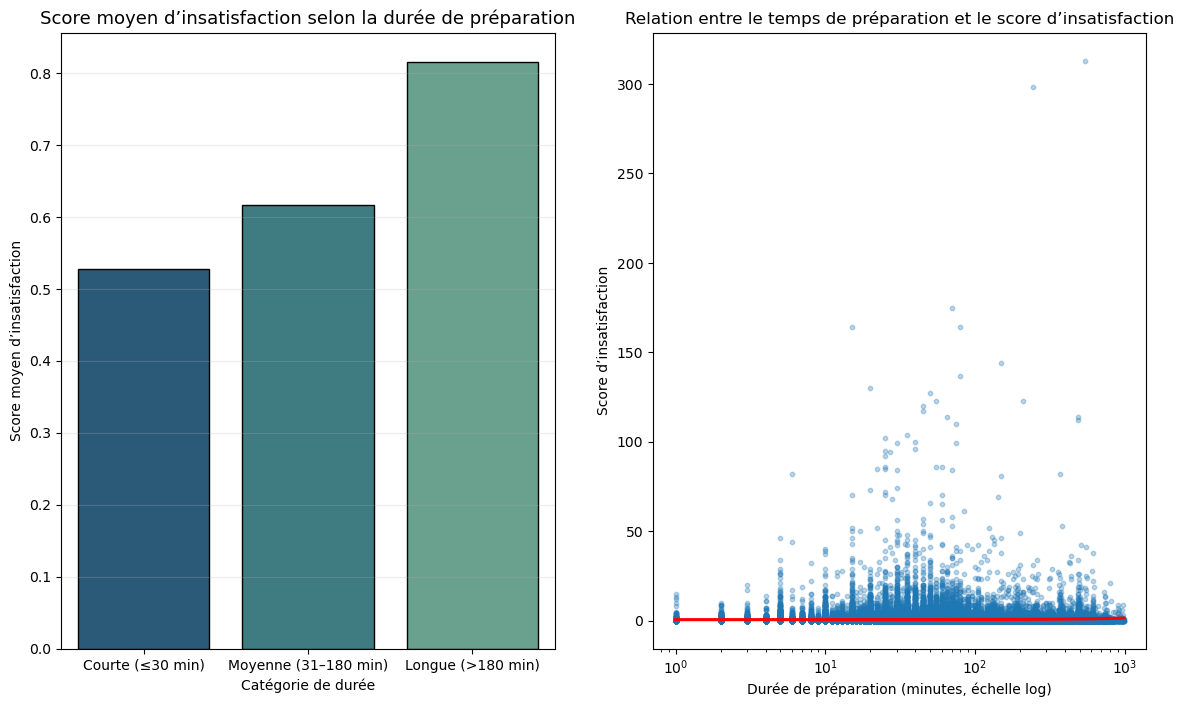

In [2]:
minutes_group_negative_reviews_bar(merged_df, show=True)

In [2]:
corr_min_negative = spearman_correlation(merged_df, 'minutes', 'negative_reviews')
print(f"coefficient de correlation de spearman entre minutes et negative_reviews : {corr_min_negative}")

coefficient de correlation de spearman entre minutes et negative_reviews : 0.0459084112230137


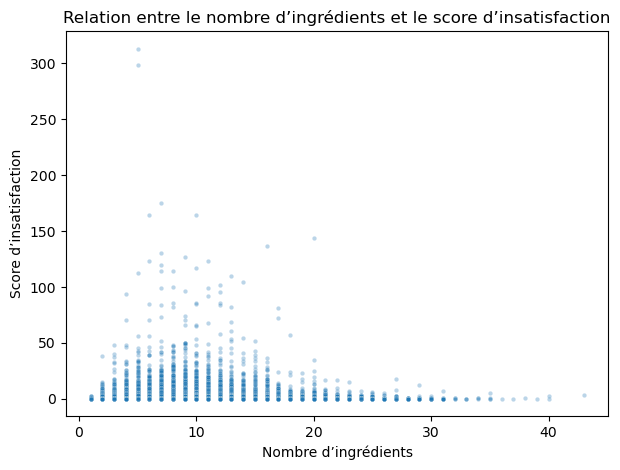

In [2]:
plot_ingredients_vs_negative_score(merged_df, show=True)

Les analyses menées sur la durée de préparation et le nombre d’ingrédients montrent qu’il n’existe pas de relation significative entre ces variables et le score d’insatisfaction des utilisateurs.
Autrement dit, une recette longue ou complexe n’est pas forcément plus critiquée qu’une recette simple ou rapide.

Ces résultats suggèrent que les facteurs techniques — tels que le temps nécessaire ou la complexité de la recette — ne sont pas les principaux déterminants de la satisfaction.
Les utilisateurs semblent plutôt juger les recettes selon des critères qualitatifs (goût, type de plat, attentes personnelles, ou présentation) plutôt que sur la durée ou la difficulté.

Ainsi, le niveau d’insatisfaction ne dépend pas directement de l’effort ou du temps investi, mais davantage de l’expérience gustative perçue ou de la catégorie culinaire.

En conclusion, il devient pertinent de poursuivre l’étude en se concentrant sur le type de recette (tags) afin d’identifier quelles catégories de plats (desserts, plats principaux, boissons, etc.) sont les plus sujettes aux critiques.

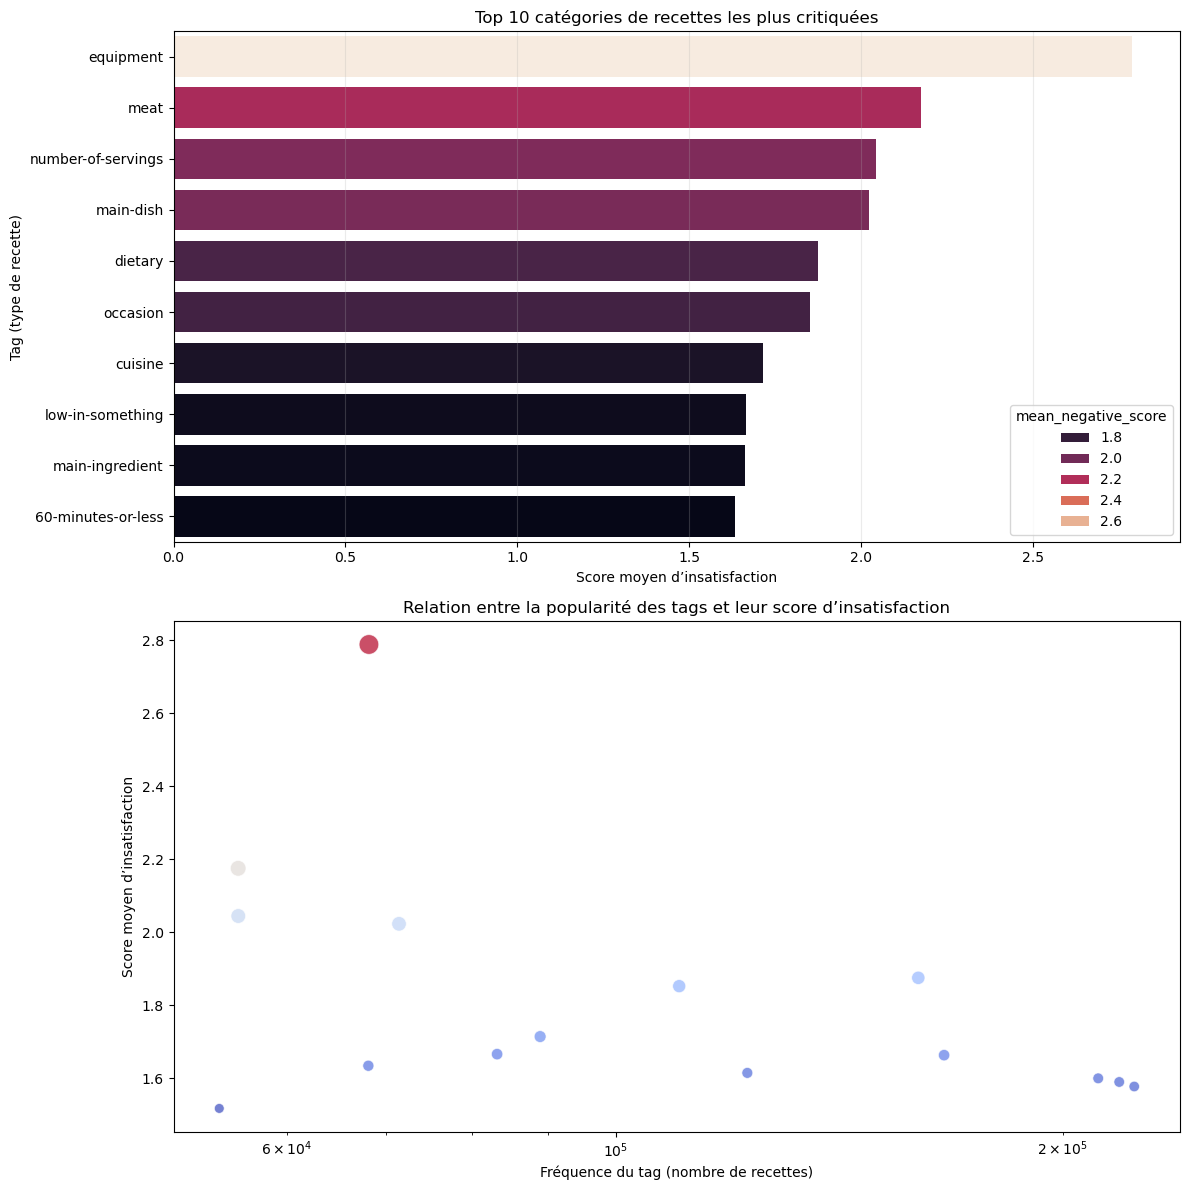

In [2]:
analyze_tags_correlation(merged_df, show=True)

Le graphique montre les 10 catégories de recettes (tags) présentant les scores moyens d’insatisfaction les plus élevés.

Les tags comme “equipment”, “meat”, “number-of-servings” ou “main-dish” apparaissent en tête, indiquant que les recettes associées à ces catégories sont plus souvent critiquées par les utilisateurs.

Ces résultats peuvent s’expliquer par plusieurs facteurs :

Les recettes “equipment” ou “meat” nécessitent souvent du matériel spécifique ou une maîtrise technique (cuissons précises, températures, ustensiles adaptés), ce qui augmente le risque d’échec.

Les plats “main-dish” ou “occasion” sont généralement préparés pour des repas importants, donc les attentes des utilisateurs sont plus fortes.


À l’inverse, des tags plus généraux ou rapides comme “60-minutes-or-less” obtiennent des scores d’insatisfaction plus faibles, ce qui reflète des recettes plus simples et accessibles.

Conclusion : Cette analyse confirme que le type de recette (capturé par les tags) joue un rôle déterminant dans la perception des utilisateurs.
Les critiques ne concernent pas tant la durée ou la complexité, mais plutôt le contexte culinaire et les attentes liées à chaque catégorie.

On observe que certains tags très fréquents (comme dietary, main-dish) ont un score d’insatisfaction moyen autour de 2, ce qui indique qu’ils sont à la fois populaires et moyennement critiqués.

En revanche, equipment est peu fréquent mais très critiqué (score proche de 2.8).

Cela signifie que la popularité n’est pas forcément liée à la satisfaction : un tag peut être très commun et pourtant globalement apprécié, ou rare mais très mal noté.

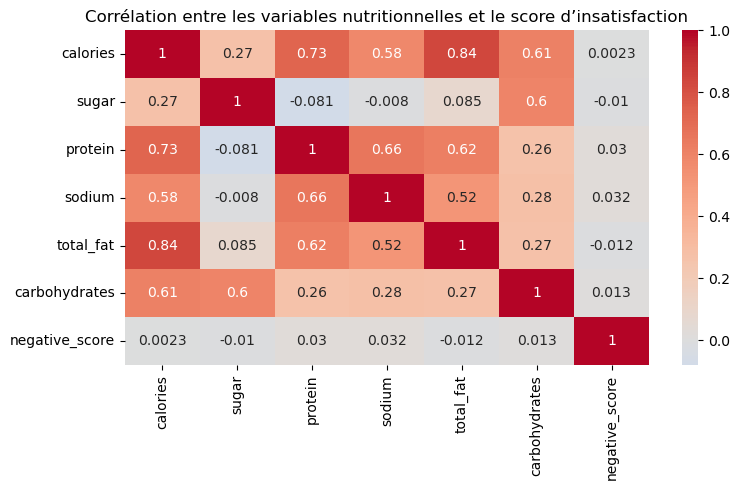

In [2]:
nutrition_correlation_analysis(merged_df, show=True)

Les caractéristiques nutritionnelles (calories, sucres, graisses, protéines, etc.) n’ont pas d’influence directe sur la perception ou la satisfaction des utilisateurs.

Que la recette soit grasse, sucrée ou salée, cela n’affecte ni le nombre d’avis négatifs, ni le score global d’insatisfaction.

### **CONCLUSION**

Nous avons effectué une analyse entre la variable a expliquer "niveau d'insatisfaction des recettes" et les variables explicatives comme le temps de préparation ou les valeurs nutritionnelles. Nous avons remarqué qu'il n'y a pas de forte corrélation. Nous pouvons donc penser que les variables seules ne suffisent pas pour expliquer le niveau d'insatisfactions des utilisateurs. 

**Ouverture pour la poursuite de l'étude**

-   Approfondir la relation entre les variables : On peut chercher à comprendre le niveau d'insatisfaction des utilisateurs avec la combinaison de plusieurs variables explicatives c'est à dire développer des modèles de machine learning pour capturer les interactions complexes entre les variables. Faire du clustering afin de regrouper des modèles selon certaines caractéristiques combinés et étudier le taux d'insatisfaction

-   On peut créer par exemple une nouvelle variable "complexité" avec "minutes / n_steps" décrivant la compléxité d'une recette.

